In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import tree

/home/filipanselmo/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/filipanselmo/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/filipanselmo/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv("iris.csv", sep=",")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
Y = df['species']
df.drop(['species'], axis=1, inplace=True)
X = df

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40)

In [6]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["sepalLength","sepalWidth","petalLength","petalWidth"],  
                         class_names=["setosa","versicolor","virginica"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("iris-tree") 

ModuleNotFoundError: No module named 'graphviz'

In [9]:
previsoes = clf.predict(X_test)

In [10]:
acuracia = accuracy_score(Y_test, previsoes)
acuracia

0.9333333333333333

In [11]:
matrizcf = confusion_matrix(Y_test, previsoes)
matrizcf

array([[23,  0,  0],
       [ 0, 15,  3],
       [ 0,  1, 18]])

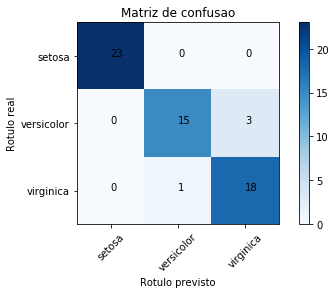

In [13]:
import matplotlib.pyplot as plt
import itertools

cm = matrizcf
cmap = plt.cm.Blues
normalize = False
classes = ["setosa", "versicolor", "virginica"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Matriz de confusao')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
tresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt))

plt.tight_layout()
plt.ylabel('Rotulo real')
plt.xlabel('Rotulo previsto')
plt.savefig("iris-confusao.pdf")
plt.show()

In [16]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, Y_train)
previsoeskNN = kNN.predict(X_test)

In [17]:
acuraciaKNN = accuracy_score(previsoeskNN, Y_test)
acuraciaKNN

0.95

<p>
    De acordo com a precisão, o modelo k-vizinhos mais próximos, é mehlor que árvore de decisão, nesse problema
</p>